# Script de Análise de Bolsa de Valores

Desenvolvido por: Naime Andere
Contato: https://www.linkedin.com/in/naimeandere/

Descrição:
Este script realiza uma análise de ações na bolsa de valores,
fornecendo insights baseados em dados históricos e indicadores financeiros com linha de tendência.
O objetivo é ajudar quem está iniciando nessa aárea de investimento poder olhar de outra maneira as ações para tomarem decisões informadas
por meio de visualizações e relatórios automatizados.

É utilizado o pacote Yahoo Finance para buscar os dados online.

Install Packages

In [1]:
!pip install pandas
!pip install matplotlib
!pip install yfinance
!pip install numpy


Importar as Bibliotecas

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import datetime
import tkinter as tk
from tkinter import messagebox
from dateutil.relativedelta import relativedelta
import warnings


# Desabilitar apenas os ConvergenceWarnings
warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels")

Função para baixar os dados do Yahoo Finance

In [3]:
def obter_dados(ticker, start_date,end_date):
    data = pd.DataFrame(yf.download(ticker,start=start_date, end=end_date))
    # Resetando o índice para transformar o índice 'Date' em uma coluna
    data.reset_index(inplace=True)

    return data

Carregar modelo Preditivo

In [4]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import SimpleExpSmoothing, Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HW

In [5]:
def HWMultiplicativo (base):
    ajuste = HW(base['Date'], trend='add', seasonal='mul', seasonal_periods=12).fit()
    fitted_ajuste = ajuste.fittedvalues
    print(ajuste.summary())

    previsao = ajuste.forecast(12)
    return previsao

Criação do Formulario para Recebimento de dados do usuario

In [6]:
# Variáveis globais para armazenar os valores inseridos
tickerlist = None
yearlist = None

# Verifica se o código está sendo executado no Colab ou local. Se for Colab então pula a criação de uma janela e trabalha com input do usuario via texto
try:
    import google.colab
    in_colab = True
except ImportError:
    in_colab = False

if in_colab == False:

  # Função para capturar e exibir os valores inseridos
  def gerar():
      global tickerlist, yearlist
      tickerlist = entrada_texto.get()
      yearlist = entrada_num1.get()

      # Verificação básica se os campos estão preenchidos
      if not tickerlist or not yearlist:
          messagebox.showwarning("Erro", "Por favor, preencha todos os campos.")
          return

      # Fechar a janela após capturar os valores
      janela.destroy()

  # Configuração da janela principal
  janela = tk.Tk()
  janela.title("Formulário de Entrada")
  janela.geometry("300x200")

  # Rótulos e entradas
  tk.Label(janela, text="Tickers:").pack()
  entrada_texto = tk.Entry(janela)
  entrada_texto.pack()

  tk.Label(janela, text="Anos de busca:").pack()
  entrada_num1 = tk.Entry(janela)
  entrada_num1.pack()

  # Botão para gerar a mensagem
  botao_gerar = tk.Button(janela, text="Gerar", command=gerar)
  botao_gerar.pack(pady=10)


Função para criar os gráficos  (Opção 3)

In [7]:
def plotar_graficos(data):
    fig, axs = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

    # Grafico 1: Abertura
    X = (data['Date'] - data['Date'].min()).dt.days.values
    Y = data['Open'].values
    n = np.size(data['Open'])
    m, b = np.polyfit(X, Y, 1)
    linha_tendencia = m * X + b

    axs[0].plot(data['Open'], label='Abertura', color='blue')
    axs[0].plot(X, linha_tendencia, color='orange', label='Linha de Tendência')
    axs[0].set_ylabel('Abertura')

    # Grafico 2: Mi­nima
    X = (data['Date'] - data['Date'].min()).dt.days.values
    Y = data['Low'].values
    n = np.size(data['Low'])
    m, b = np.polyfit(X, Y, 1)
    linha_tendencia = m * X + b

    axs[1].plot(data['Low'], label='Minima', color='green')
    axs[1].plot(X, linha_tendencia, color='orange', label='Linha de Tendência')
    axs[1].set_ylabel('Minima')

    # Grafico 3: Maxima
    X = (data['Date'] - data['Date'].min()).dt.days.values
    Y = data['High'].values
    n = np.size(data['High'])
    m, b = np.polyfit(X, Y, 1)
    linha_tendencia = m * X + b

    axs[2].plot(data['High'], label='Maxima', color='red')
    axs[2].plot(X, linha_tendencia, color='orange', label='Linha de Tendência')
    axs[2].set_ylabel('Maxima')

    # Grafico 4: Fechamento
    X = (data['Date'] - data['Date'].min()).dt.days.values
    Y = data['Close'].values
    n = np.size(data['Close'])
    m, b = np.polyfit(X, Y, 1)
    linha_tendencia = m * X + b

    axs[3].plot(data['Close'], label='Fechamento', color='purple')
    axs[3].plot(X, linha_tendencia, color='orange', label='Linha de Tendência')
    axs[3].set_ylabel('Fechamento')

    axs[3].set_xlabel('Data')

    # Adiciona legenda
    axs[0].legend()
    axs[1].legend()
    axs[2].legend()
    axs[3].legend()

    plt.tight_layout()
    plt.show()

Plotar somente graficos de Closed ( Opção 1)

In [8]:
def plotar_graficos_fechamento(data):

    previsao_mult = HWMultiplicativo(data)
    previsao_mult

    plt.plot(figsize=(10, 8), sharex=True)

    # Grafico 4: Fechamento
    X = (data['Date'] - data['Date'].min()).dt.days.values
    Y = data['Close'].values
    n = np.size(data['Close'])
    m, b = np.polyfit(X, Y, 1)
    linha_tendencia = m * X + b

    plt.plot(data['Close'], label='Fechamento', color='purple')
    plt.plot(X, linha_tendencia, color='orange', label='Linha de Tendência')
    plt.ylabel('Fechamento')

    plt.xlabel(f'últimos {len(data)} dias')

    # Adiciona legenda
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

Função para Gráficos comparativo (Opção 2)

In [9]:
def plotar_graficos_comparativos(dados):

    plt.figure(figsize=(10,6))

    for dado in dados:
        X = (dado['Date'] - dado['Date'].min()).dt.days.values
        Y = (dado['Close'])
        plt.plot(X,Y)
        plt.grid()


plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

Função para criar uma lista de escolhas para facilitar para o usuário

In [10]:
def choose(options):
    # Exibir as opções disponíveis
    print("Escolha uma das opções abaixo:")
    for i, option in enumerate(options, 1):
        print(f"{i}. {option}")

    # Solicitar a entrada do usuário
    try:
        index = int(input("Digite o número da sua escolha: "))
        if 1 <= index <= len(options):
            return options[index - 1]
        else:
            return "Escolha inválida, índice fora do intervalo."
    except ValueError:
        return "Escolha inválida, por favor insira um número."

Grafico com tendencia variada

In [11]:
def graficoHW(base2):

    # Convertendo a coluna 'Date' para datetime
    base2['Date2'] = pd.to_datetime(base2['Date'])
    (base2['Date2'] - base2['Date2'].min()).dt.days

    # Extraindo apenas a parte da data
    base2['Date'] = base2['Date'].dt.date

    #Valor Ajustado
    ticker = base2.columns[1][1]
    ajuste = HW(base2[('Close',ticker)], trend='add', seasonal='mul', seasonal_periods=365).fit()
    fitted_ajuste = ajuste.fittedvalues
    base2['DadosAjustados'] = fitted_ajuste

    prevajuste = ajuste.forecast(365)

    #Forecast
    forecast_index = pd.date_range(start=max(base2['Date']), periods=len(prevajuste), freq='D')
    model_type="Aditivo"

    plt.figure(figsize=(10, 6))

    # Obter datas para o período da previsão
    forecast_index = pd.date_range(start=max(base2['Date']), periods=len(prevajuste), freq='D')

    # Dados para a linha de tendência
    X = (base2['Date2'] - base2['Date2'].min()).dt.days
    Y = base2['Close'].values
    n = np.size(base2['Close'])
    m, b = np.polyfit(X, Y, 1)
    linha_tendencia = m * X + b

    # Plotando os dados originais, ajustados e previsão
    plt.plot(base2['Date'], base2['Close'], label="Dados Originais", color='blue')
    plt.plot(base2['Date'], base2['DadosAjustados'], label="Valores Ajustados", color='green')
    plt.plot(base2['Date'], linha_tendencia, color='orange', label='Linha de Tendência')
    plt.plot(forecast_index, prevajuste, label="Previsão", color='red')

    # Intervalo de confiança
    plt.fill_between(forecast_index, prevajuste * 0.95, prevajuste * 1.05, color='gray', alpha=0.2, label="Intervalo de Confiança 95%")

    plt.title(f"Modelo Holt-Winters ({model_type})", fontsize=14)
    plt.xlabel("Período", fontsize=12)
    plt.ylabel("Valores", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Define Ticker, data de inicio, data de fim e mandar rodar a função para buscar os dados e plotar no gráfico

Entre com os nome das ações separadas por virgura, ex: PETR3.SA,MGLU3.SA,VALE3.SA  PETR4.SA, VALE3.SA, ITUB4.SA, BBDC4.SA, ABEV3.SA, BBAS3.SA, MGLU3.SA, ELET3.SA, GGBR4.SA, B3SA3.SA
Entre com tempo em anos do período da busca:  3


[*********************100%***********************]  1 of 1 completed


******************************************************************
Nome: PETROBRAS   PN      N2
Tipo: Oil & Gas Integrated
Datas entre: 2021-11-08 e 2024-11-08


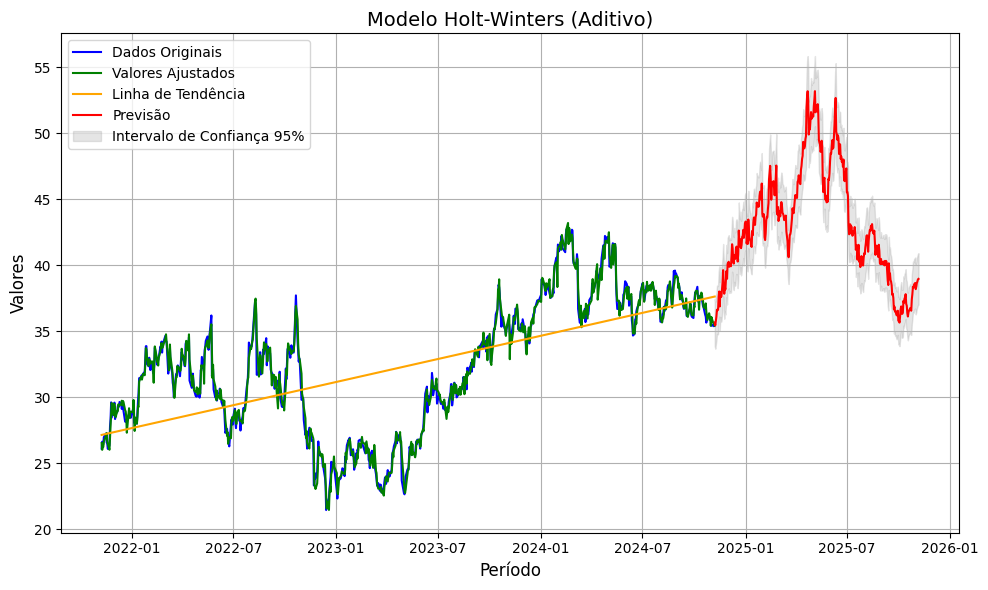

[*********************100%***********************]  1 of 1 completed


******************************************************************
Nome: VALE        ON      NM
Tipo: Other Industrial Metals & Mining
Datas entre: 2021-11-08 e 2024-11-08


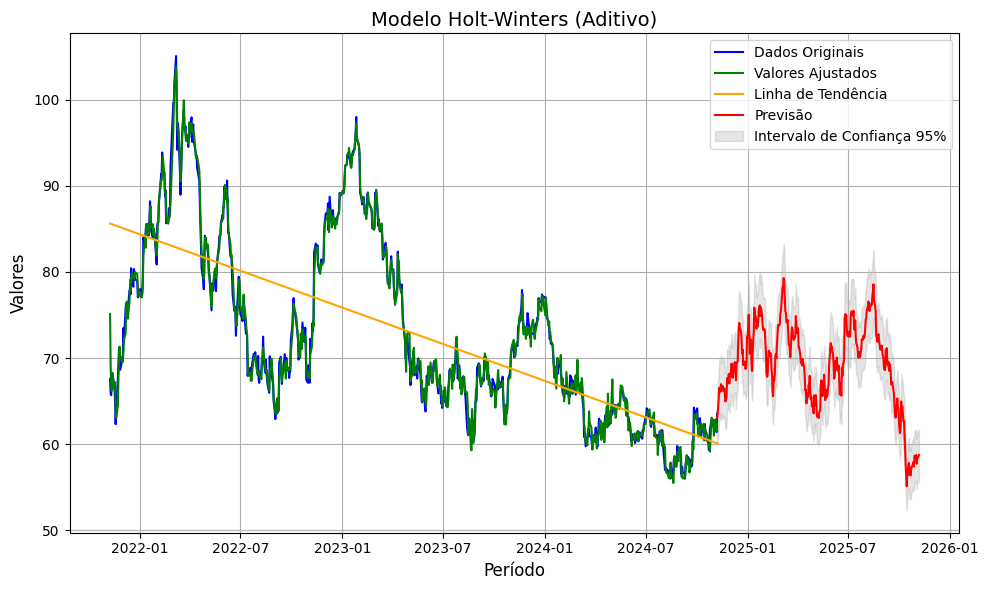

[*********************100%***********************]  1 of 1 completed


******************************************************************
Nome: ITAUUNIBANCOPN  EJ  N1
Tipo: Banks - Regional
Datas entre: 2021-11-08 e 2024-11-08


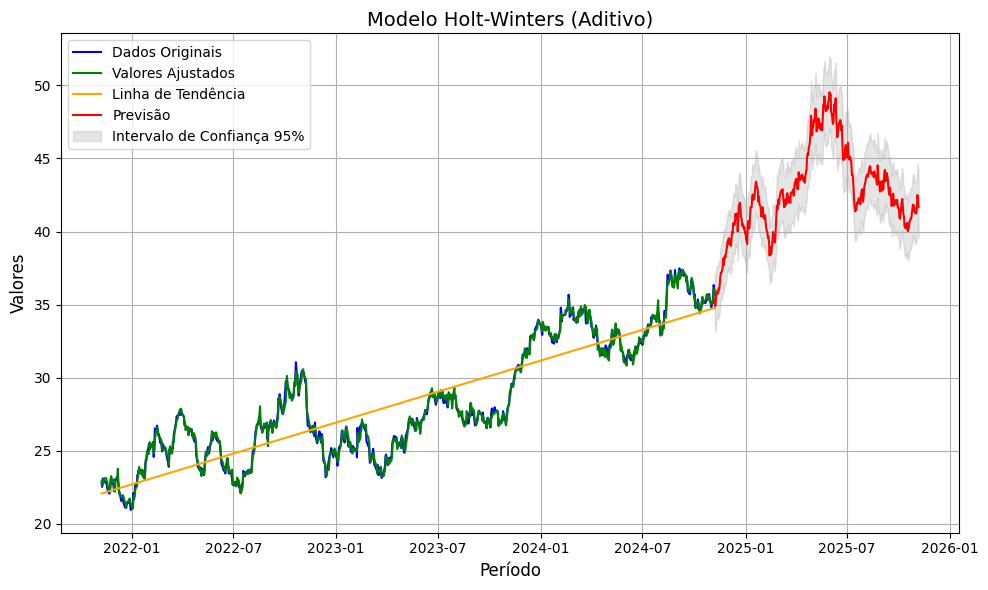

[*********************100%***********************]  1 of 1 completed


******************************************************************
Nome: BRADESCO    PN      N1
Tipo: Banks - Regional
Datas entre: 2021-11-08 e 2024-11-08


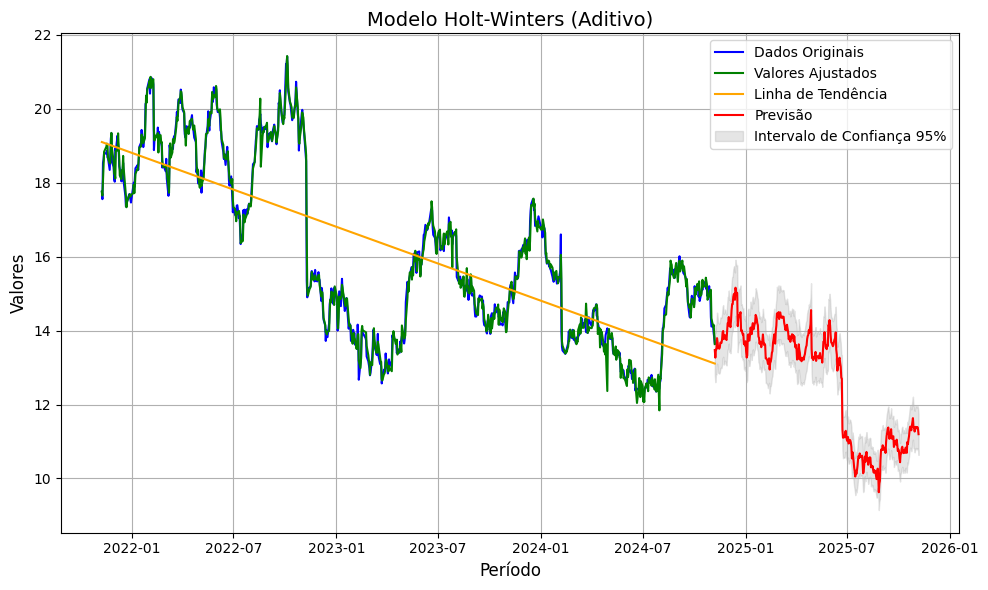

[*********************100%***********************]  1 of 1 completed


******************************************************************
Nome: AMBEV S/A   ON
Tipo: Beverages - Brewers
Datas entre: 2021-11-08 e 2024-11-08


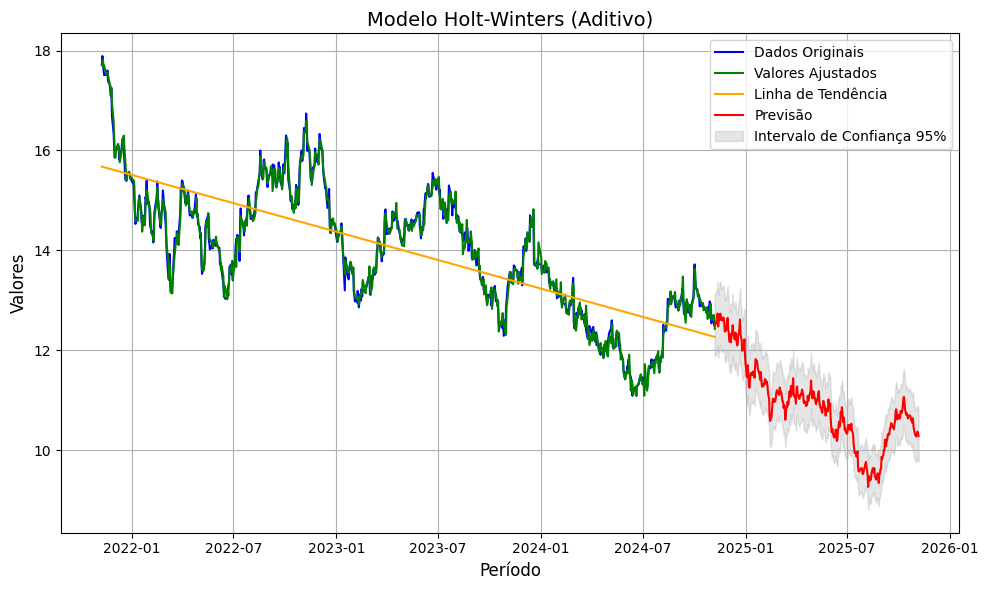

[*********************100%***********************]  1 of 1 completed


******************************************************************
Nome: BRASIL      ON      NM
Tipo: Banks - Regional
Datas entre: 2021-11-08 e 2024-11-08


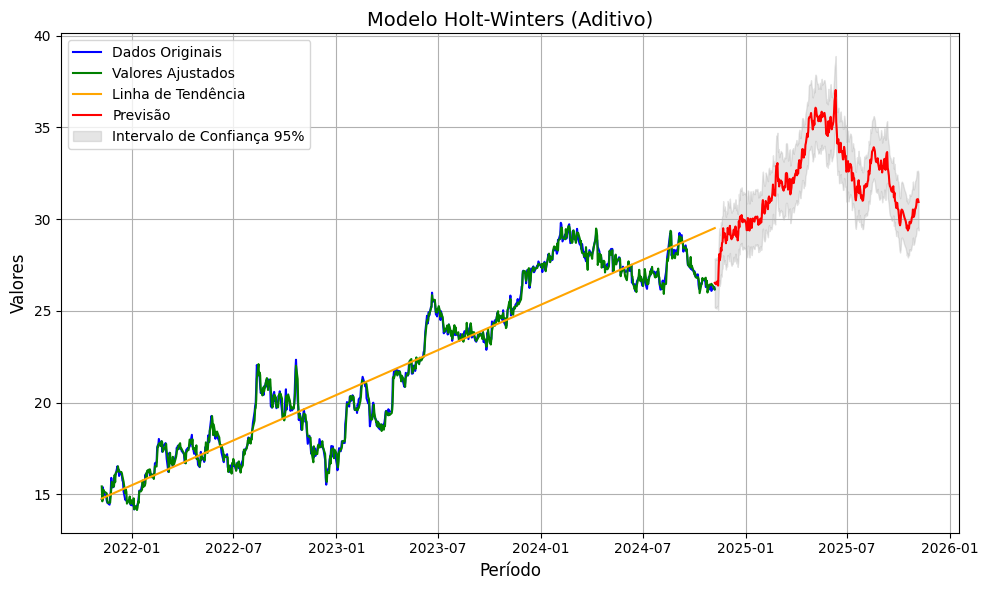

[*********************100%***********************]  1 of 1 completed


******************************************************************
Nome: MAGAZ LUIZA ON      NM
Tipo: Specialty Retail
Datas entre: 2021-11-08 e 2024-11-08


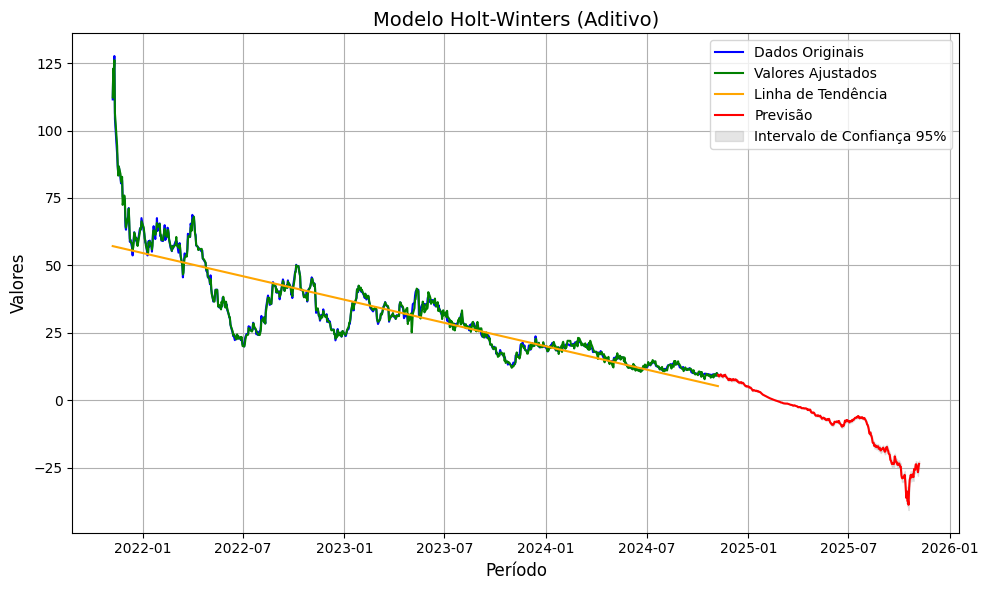

[*********************100%***********************]  1 of 1 completed


******************************************************************
Nome: ELETROBRAS  ON      N1
Tipo: Utilities - Renewable
Datas entre: 2021-11-08 e 2024-11-08


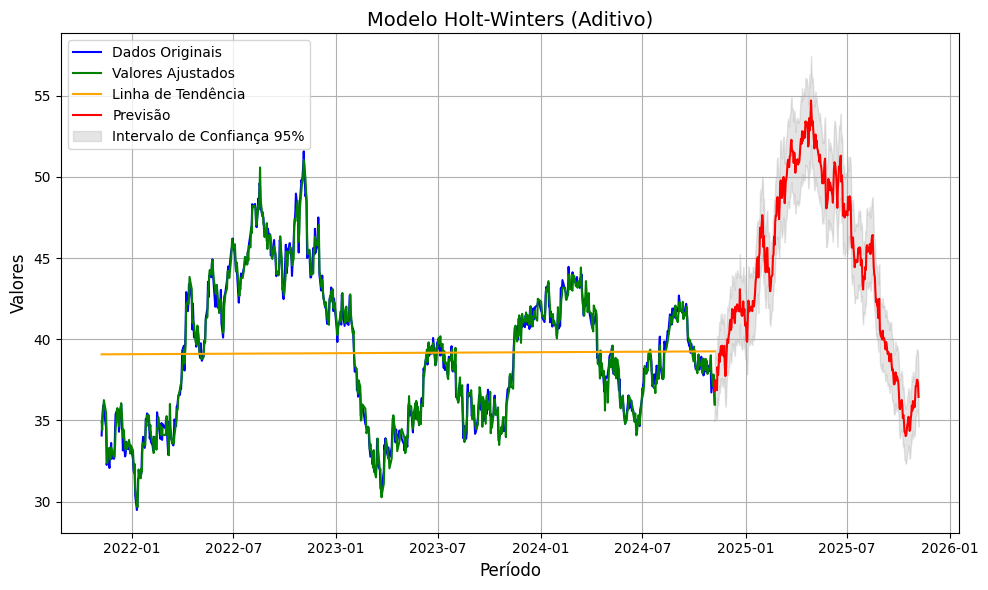

[*********************100%***********************]  1 of 1 completed


******************************************************************
Nome: GERDAU      PN      N1
Tipo: Steel
Datas entre: 2021-11-08 e 2024-11-08


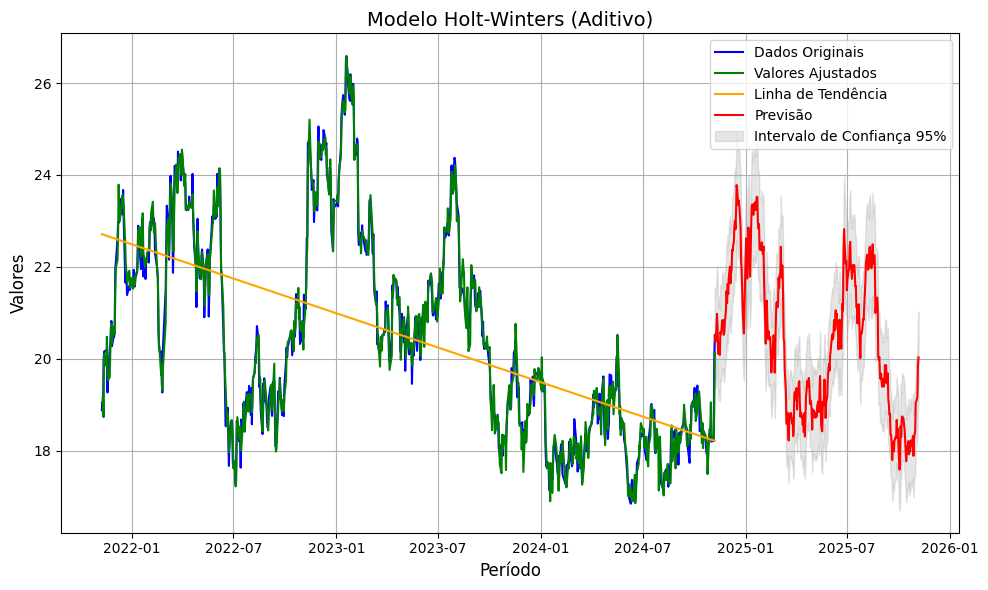

[*********************100%***********************]  1 of 1 completed


******************************************************************
Nome: B3          ON      NM
Tipo: Financial Data & Stock Exchanges
Datas entre: 2021-11-08 e 2024-11-08


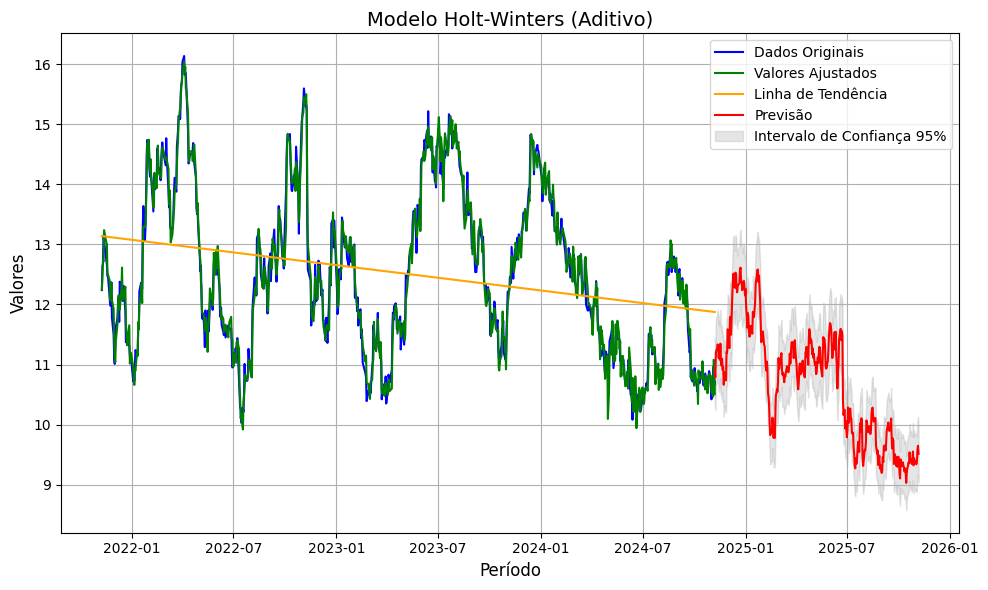

In [24]:
try:
    import google.colab
    in_colab = True
except ImportError:
    in_colab = False

if in_colab == True:
    # recebe valor com nome das ações do usuario
    inputTickers = input("Entre com os nome das ações separadas por virgura, ex: PETR3.SA,MGLU3.SA,VALE3.SA  ")
    # recebe a quantidade de anos que deseja buscar
    inputYear = input("Entre com tempo em anos do período da busca:  ")
else:
  # Executa a aplicação
  janela.mainloop()
  # Agora você pode acessar tickerlist e yearlist
  inputTickers =  tickerlist
  inputYear =  yearlist





# cria uma lista com os valores recebidos
if len(inputTickers) > 0:
    tickers =  [valor.strip().upper() for valor in inputTickers.split(',') ]
else:
    # caso o valor for em branco, entrão recebe valor padrão
    tickers = ["VALE","PETR3.SA","MGLU3.SA","VALE3.SA"]

# Data de término é sempre a data atual
end_date = today = datetime.date.today()

# verifica se teve data de início
if len(inputYear) > 0:
    start_date = end_date - relativedelta(years=int(inputYear))
else:
    # se receber valor em branco, então busca o valor padrão
    start_date = end_date - relativedelta(years=3)

# cria uma tabela para receber os dados
dados = []

#Cria a verificação de escolha de retorno
#opcoes = ["Um gráfico para cada ação", "Todas as ações em um único gráfico","Plotar gráficos completos"]
#escolha = choose(opcoes)
#print(f"Você escolheu: {escolha}")

for ticker in tickers:
  dados = obter_dados(ticker,start_date,end_date)
  print('******************************************************************')
  info = yf.Ticker(ticker).info
  print(f"Nome: {info['shortName']}")
  print(f"Tipo: {info['industry']}")
  print(f"Datas entre: {start_date} e {end_date}")
  #plotar_graficos_fechamento(dados)
  graficoHW(dados)
